Proyek Analisis Data
- Nama: Rama Anindya
- Email: ramaanindyaa@gmail.com
- ID Dicoding: a629ybm414

Menentukan pertanyaan bisnis:
- Pengaruh Musim (season) terhadap Jumlah Sewa Sepeda (cnt)
- Pengaruh Hari Kerja (workingday) vs Akhir Pekan (holiday) terhadap Jumlah Sewa Sepeda
- Pengaruh Suhu (temp) terhadap Jumlah Sewa Sepeda
- Pengaruh Hari dalam Seminggu (weekday) terhadap Jumlah Sewa Sepeda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/ramaanindyaa/dataprojectanalisis/refs/heads/main/day.csv")  

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/ramaanindyaa/dataprojectanalisis/refs/heads/main/hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

In [4]:
print("===== Info Dataset =====")
print(day_df.info())  # Cek tipe data, jumlah kolom, dan missing values

print("\n===== 5 Data Pertama =====")
print(day_df.head())  # Preview data

===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

===== 5 Data Pertama =====
   instant      dteday  season  yr 

In [5]:
print("===== Info Dataset =====")
print(hour_df.info())  # Cek tipe data, jumlah kolom, dan missing values

print("\n===== 5 Data Pertama =====")
print(hour_df.head())  # Preview data

===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

===== 5 Data Perta

In [6]:
# Memeriksa missing values di kedua dataset
print("\n==== Missing Values di day_df ====")
print(day_df.isnull().sum())

print("\n==== Missing Values di hour_df ====")
print(hour_df.isnull().sum())


==== Missing Values di day_df ====
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

==== Missing Values di hour_df ====
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# Memeriksa duplikasi dalam dataset
print("\n==== Duplikasi di day_df ====")
print(day_df.duplicated().sum())  # Menampilkan jumlah duplikat

print("\n==== Duplikasi di hour_df ====")
print(hour_df.duplicated().sum())  # Menampilkan jumlah duplikat



==== Duplikasi di day_df ====
0

==== Duplikasi di hour_df ====
0


In [8]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [9]:
print("Day Data Shape:", day_df.shape)
print("Hour Data Shape:", hour_df.shape)

print("\nDay Data Types:")
print(day_df.dtypes)

print("\nHour Data Types:")
print(hour_df.dtypes)

Day Data Shape: (731, 16)
Hour Data Shape: (17379, 17)

Day Data Types:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Hour Data Types:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int

In [10]:
# Memeriksa statistik deskriptif untuk kedua dataset
print("\n==== Statistik Deskriptif day_df ====")
print(day_df.describe())

print("\n==== Statistik Deskriptif hour_df ====")
print(hour_df.describe())


==== Statistik Deskriptif day_df ====
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.0000

Cleaning Data

In [11]:
# Definisikan mapping untuk season dan weekday
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

In [12]:
# 1. Mengubah kolom 'season' menjadi nama musim
day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

In [13]:
# 2. Mengubah kolom 'yr' menjadi tahun yang sebenarnya (2011 atau 2012)
day_df['yr'] = day_df['yr'].map({0: 2011, 1: 2012})
hour_df['yr'] = hour_df['yr'].map({0: 2011, 1: 2012})

In [14]:
# 3. Mengubah kolom 'mnth' menjadi nama bulan
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 
                 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
                 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

day_df['mnth'] = day_df['mnth'].map(month_mapping)
hour_df['mnth'] = hour_df['mnth'].map(month_mapping)

In [15]:
# 4. Mengubah kolom 'holiday' dan 'workingday' menjadi 'Yes' atau 'No'
day_df['holiday'] = day_df['holiday'].map({0: 'No', 1: 'Yes'})
hour_df['holiday'] = hour_df['holiday'].map({0: 'No', 1: 'Yes'})

day_df['workingday'] = day_df['workingday'].map({0: 'No', 1: 'Yes'})
hour_df['workingday'] = hour_df['workingday'].map({0: 'No', 1: 'Yes'})

In [16]:
# 5. Mengubah kolom 'weekday' menjadi nama hari
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

In [17]:
# Memeriksa nilai unik pada kolom 'weathersit' untuk memastikan nilai-nilai yang ada
print(day_df['weathersit'].unique())
print(hour_df['weathersit'].unique())

[2 1 3]
[1 2 3 4]


In [18]:
# Membuat pemetaan dari angka 1-4 ke label kondisi cuaca
weather_mapping_short = {
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

# Menerapkan pemetaan ke kolom 'weathersit' pada dataset
day_df['weathersit'] = day_df['weathersit'].map(weather_mapping_short)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_mapping_short)

# Memeriksa hasil perubahan pada beberapa data pertama
print("Contoh data pada kolom 'weathersit' (per hari):")
print(day_df[['dteday', 'weathersit']].head())

print("\nContoh data pada kolom 'weathersit' (per jam):")
print(hour_df[['dteday', 'weathersit']].head())


Contoh data pada kolom 'weathersit' (per hari):
      dteday     weathersit
0 2011-01-01  Mist + Cloudy
1 2011-01-02  Mist + Cloudy
2 2011-01-03          Clear
3 2011-01-04          Clear
4 2011-01-05          Clear

Contoh data pada kolom 'weathersit' (per jam):
      dteday weathersit
0 2011-01-01      Clear
1 2011-01-01      Clear
2 2011-01-01      Clear
3 2011-01-01      Clear
4 2011-01-01      Clear


In [19]:
# Menampilkan perubahan pada beberapa baris pertama di kedua dataset
print("DataFrame Day Setelah Pembersihan:")
print(day_df.head())

print("\nDataFrame Hour Setelah Pembersihan:")
print(hour_df.head())

DataFrame Day Setelah Pembersihan:
   instant     dteday  season    yr     mnth holiday    weekday workingday  \
0        1 2011-01-01  Spring  2011  January      No   Saturday         No   
1        2 2011-01-02  Spring  2011  January      No     Sunday         No   
2        3 2011-01-03  Spring  2011  January      No     Monday        Yes   
3        4 2011-01-04  Spring  2011  January      No    Tuesday        Yes   
4        5 2011-01-05  Spring  2011  January      No  Wednesday        Yes   

      weathersit      temp     atemp       hum  windspeed  casual  registered  \
0  Mist + Cloudy  0.344167  0.363625  0.805833   0.160446     331         654   
1  Mist + Cloudy  0.363478  0.353739  0.696087   0.248539     131         670   
2          Clear  0.196364  0.189405  0.437273   0.248309     120        1229   
3          Clear  0.200000  0.212122  0.590435   0.160296     108        1454   
4          Clear  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  

Exploratory Data Analys (EDA)

In [20]:
# 1. Pengaruh Musim terhadap Jumlah Sewa Sepeda (per hari)
season_avg_rentals_day = day_df.groupby('season')['cnt'].mean()
season_avg_rentals_hour = hour_df.groupby('season')['cnt'].mean()

# Tampilkan hasil
print("Rata-rata jumlah sewa sepeda per musim (per hari):")
print(season_avg_rentals_day)

print("\nRata-rata jumlah sewa sepeda per musim (per jam):")
print(season_avg_rentals_hour)

Rata-rata jumlah sewa sepeda per musim (per hari):
season
Fall      5644.303191
Spring    2604.132597
Summer    4992.331522
Winter    4728.162921
Name: cnt, dtype: float64

Rata-rata jumlah sewa sepeda per musim (per jam):
season
Fall      236.016237
Spring    111.114569
Summer    208.344069
Winter    198.868856
Name: cnt, dtype: float64


In [21]:
# 2. Pengaruh Hari Kerja vs Hari Libur terhadap Jumlah Sewa Sepeda (per hari)
workingday_avg_rentals_day = day_df.groupby('workingday')['cnt'].mean()
holiday_avg_rentals_day = day_df.groupby('holiday')['cnt'].mean()

workingday_avg_rentals_hour = hour_df.groupby('workingday')['cnt'].mean()
holiday_avg_rentals_hour = hour_df.groupby('holiday')['cnt'].mean()

# Tampilkan hasil
print("\nRata-rata jumlah sewa sepeda pada hari kerja vs hari libur (per hari):")
print(f"Workingday vs Non-workingday (per hari): {workingday_avg_rentals_day}")
print(f"Holiday vs Non-holiday (per hari): {holiday_avg_rentals_day}")

print("\nRata-rata jumlah sewa sepeda pada hari kerja vs hari libur (per jam):")
print(f"Workingday vs Non-workingday (per jam): {workingday_avg_rentals_hour}")
print(f"Holiday vs Non-holiday (per jam): {holiday_avg_rentals_hour}")



Rata-rata jumlah sewa sepeda pada hari kerja vs hari libur (per hari):
Workingday vs Non-workingday (per hari): workingday
No     4330.168831
Yes    4584.820000
Name: cnt, dtype: float64
Holiday vs Non-holiday (per hari): holiday
No     4527.104225
Yes    3735.000000
Name: cnt, dtype: float64

Rata-rata jumlah sewa sepeda pada hari kerja vs hari libur (per jam):
Workingday vs Non-workingday (per jam): workingday
No     181.405332
Yes    193.207754
Name: cnt, dtype: float64
Holiday vs Non-holiday (per jam): holiday
No     190.42858
Yes    156.87000
Name: cnt, dtype: float64


In [22]:
# 3. Pengaruh Suhu terhadap Jumlah Sewa Sepeda
temperature_correlation_day = day_df[['temp', 'cnt']].corr()
temperature_correlation_hour = hour_df[['temp', 'cnt']].corr()

# Tampilkan hasil
print("\nKorelasi antara suhu dan jumlah sewa sepeda (per hari):")
print(temperature_correlation_day)

print("\nKorelasi antara suhu dan jumlah sewa sepeda (per jam):")
print(temperature_correlation_hour)


Korelasi antara suhu dan jumlah sewa sepeda (per hari):
          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000

Korelasi antara suhu dan jumlah sewa sepeda (per jam):
          temp       cnt
temp  1.000000  0.404772
cnt   0.404772  1.000000


In [23]:
# 4. Pengaruh Hari dalam Seminggu terhadap Jumlah Sewa Sepeda
weekday_avg_rentals_day = day_df.groupby('weekday')['cnt'].mean()
weekday_avg_rentals_hour = hour_df.groupby('weekday')['cnt'].mean()

# Tampilkan hasil
print("\nRata-rata jumlah sewa sepeda berdasarkan hari dalam seminggu (per hari):")
print(weekday_avg_rentals_day)

print("\nRata-rata jumlah sewa sepeda berdasarkan hari dalam seminggu (per jam):")
print(weekday_avg_rentals_hour)



Rata-rata jumlah sewa sepeda berdasarkan hari dalam seminggu (per hari):
weekday
Friday       4690.288462
Monday       4338.123810
Saturday     4550.542857
Sunday       4228.828571
Thursday     4667.259615
Tuesday      4510.663462
Wednesday    4548.538462
Name: cnt, dtype: float64

Rata-rata jumlah sewa sepeda berdasarkan hari dalam seminggu (per jam):
weekday
Friday       196.135907
Monday       183.744655
Saturday     190.209793
Sunday       177.468825
Thursday     196.436665
Tuesday      191.238891
Wednesday    191.130505
Name: cnt, dtype: float64


In [24]:
# 5. Pengaruh Kondisi Cuaca terhadap Jumlah Sewa Sepeda
weather_avg_rentals_day = day_df.groupby('weathersit')['cnt'].mean()
weather_avg_rentals_hour = hour_df.groupby('weathersit')['cnt'].mean()

# Tampilkan hasil
print("\nRata-rata jumlah sewa sepeda berdasarkan kondisi cuaca (per hari):")
print(weather_avg_rentals_day)

print("\nRata-rata jumlah sewa sepeda berdasarkan kondisi cuaca (per jam):")
print(weather_avg_rentals_hour)



Rata-rata jumlah sewa sepeda berdasarkan kondisi cuaca (per hari):
weathersit
Clear              4876.786177
Light Rain/Snow    1803.285714
Mist + Cloudy      4035.862348
Name: cnt, dtype: float64

Rata-rata jumlah sewa sepeda berdasarkan kondisi cuaca (per jam):
weathersit
Clear              204.869272
Heavy Rain/Snow     74.333333
Light Rain/Snow    111.579281
Mist + Cloudy      175.165493
Name: cnt, dtype: float64


Visualization & Explanatory Analysis

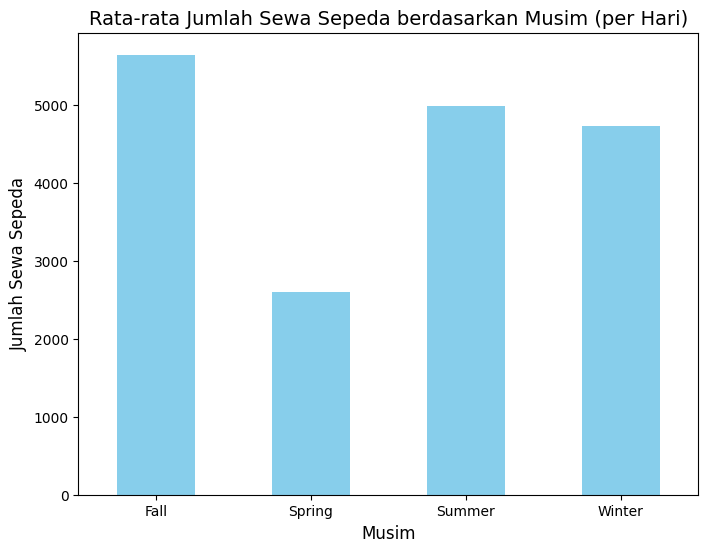

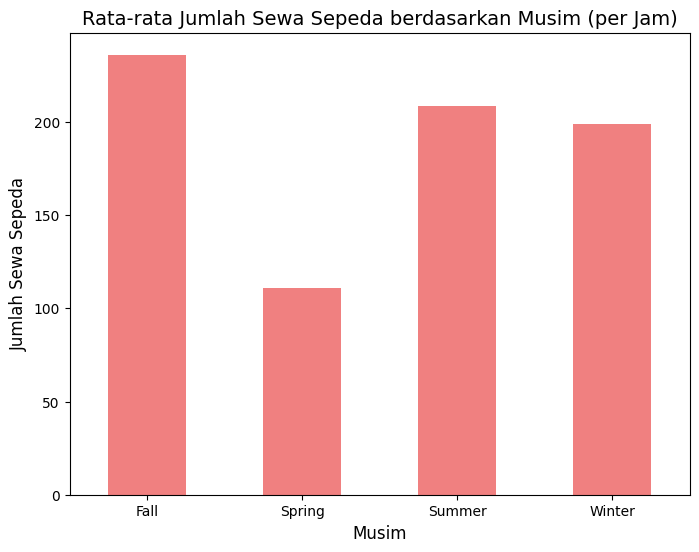

In [25]:
# 1. Visualisasi Pengaruh Musim terhadap Jumlah Sewa Sepeda (per hari)
plt.figure(figsize=(8, 6))
season_avg_rentals_day.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Jumlah Sewa Sepeda berdasarkan Musim (per Hari)', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 2. Visualisasi Pengaruh Musim terhadap Jumlah Sewa Sepeda (per jam)
plt.figure(figsize=(8, 6))
season_avg_rentals_hour.plot(kind='bar', color='lightcoral')
plt.title('Rata-rata Jumlah Sewa Sepeda berdasarkan Musim (per Jam)', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.show()

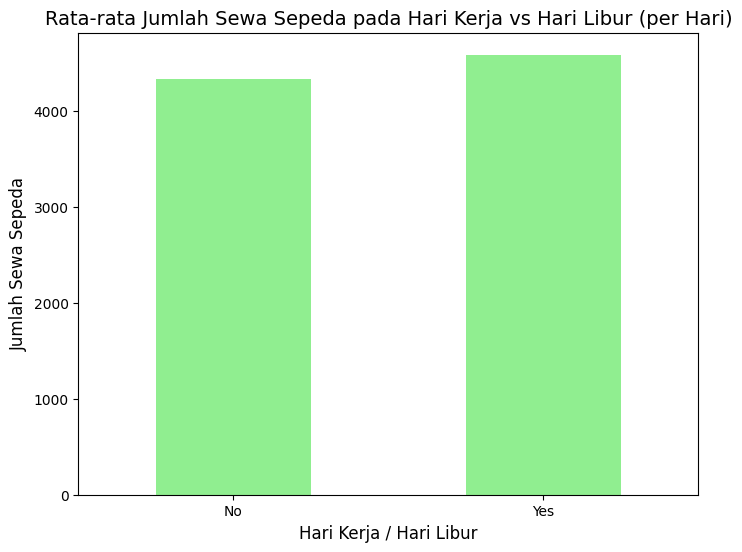

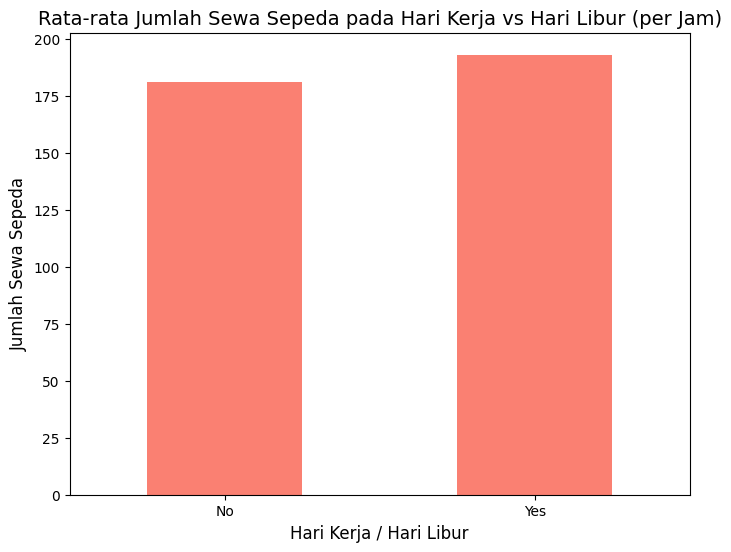

In [26]:
# 3. Visualisasi Hari Kerja vs Hari Libur terhadap Jumlah Sewa Sepeda (per hari)
plt.figure(figsize=(8, 6))
workingday_avg_rentals_day.plot(kind='bar', color='lightgreen')
plt.title('Rata-rata Jumlah Sewa Sepeda pada Hari Kerja vs Hari Libur (per Hari)', fontsize=14)
plt.xlabel('Hari Kerja / Hari Libur', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 4. Visualisasi Hari Kerja vs Hari Libur terhadap Jumlah Sewa Sepeda (per jam)
plt.figure(figsize=(8, 6))
workingday_avg_rentals_hour.plot(kind='bar', color='salmon')
plt.title('Rata-rata Jumlah Sewa Sepeda pada Hari Kerja vs Hari Libur (per Jam)', fontsize=14)
plt.xlabel('Hari Kerja / Hari Libur', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.show()


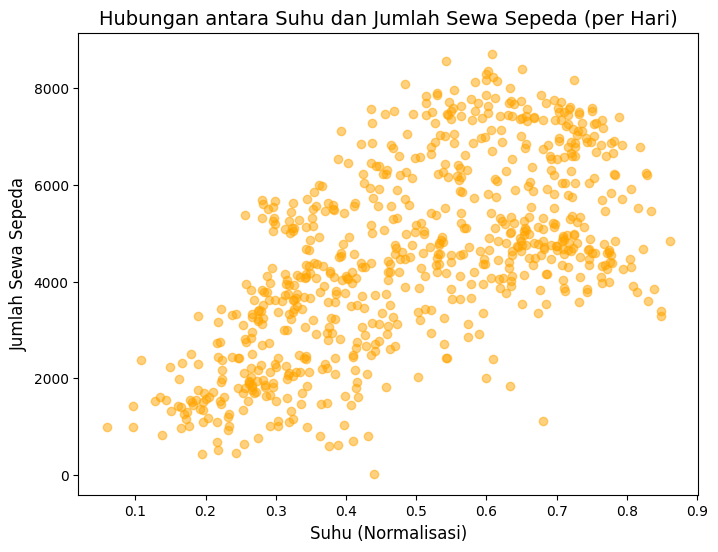

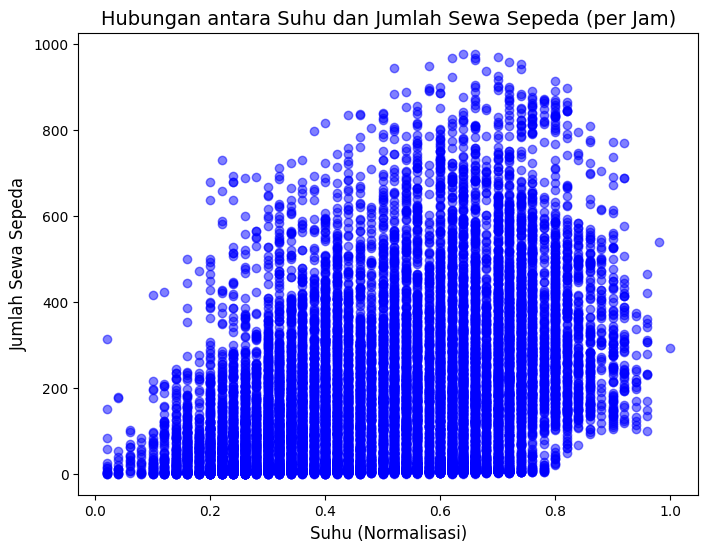

In [27]:
# 5. Visualisasi Pengaruh Suhu terhadap Jumlah Sewa Sepeda (per hari)
plt.figure(figsize=(8, 6))
plt.scatter(day_df['temp'], day_df['cnt'], alpha=0.5, color='orange')
plt.title('Hubungan antara Suhu dan Jumlah Sewa Sepeda (per Hari)', fontsize=14)
plt.xlabel('Suhu (Normalisasi)', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.show()

# 6. Visualisasi Pengaruh Suhu terhadap Jumlah Sewa Sepeda (per jam)
plt.figure(figsize=(8, 6))
plt.scatter(hour_df['temp'], hour_df['cnt'], alpha=0.5, color='blue')
plt.title('Hubungan antara Suhu dan Jumlah Sewa Sepeda (per Jam)', fontsize=14)
plt.xlabel('Suhu (Normalisasi)', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.show()


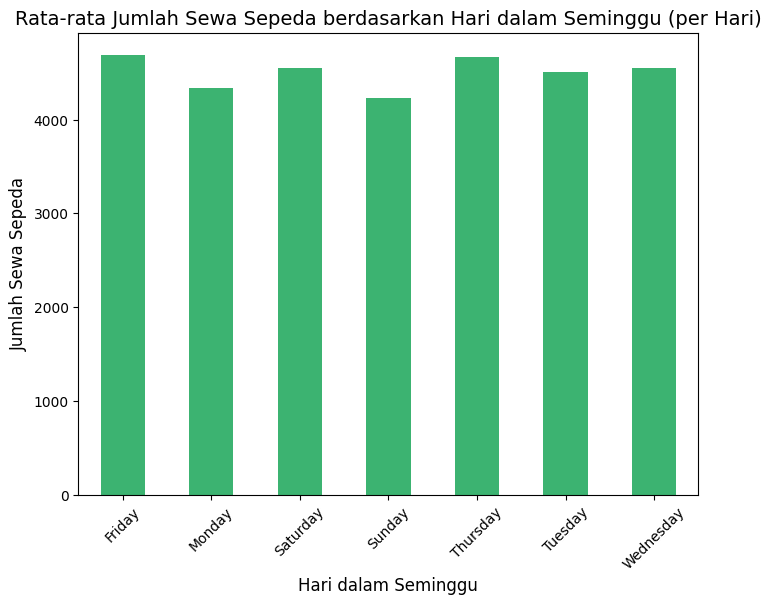

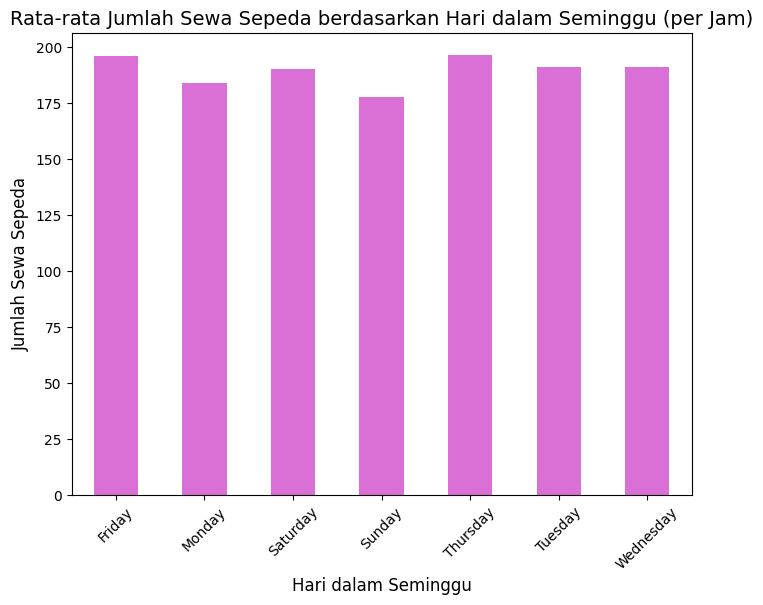

In [28]:
# 7. Visualisasi Pengaruh Hari dalam Seminggu terhadap Jumlah Sewa Sepeda (per hari)
plt.figure(figsize=(8, 6))
weekday_avg_rentals_day.plot(kind='bar', color='mediumseagreen')
plt.title('Rata-rata Jumlah Sewa Sepeda berdasarkan Hari dalam Seminggu (per Hari)', fontsize=14)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 8. Visualisasi Pengaruh Hari dalam Seminggu terhadap Jumlah Sewa Sepeda (per jam)
plt.figure(figsize=(8, 6))
weekday_avg_rentals_hour.plot(kind='bar', color='orchid')
plt.title('Rata-rata Jumlah Sewa Sepeda berdasarkan Hari dalam Seminggu (per Jam)', fontsize=14)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.xticks(rotation=45)
plt.show()

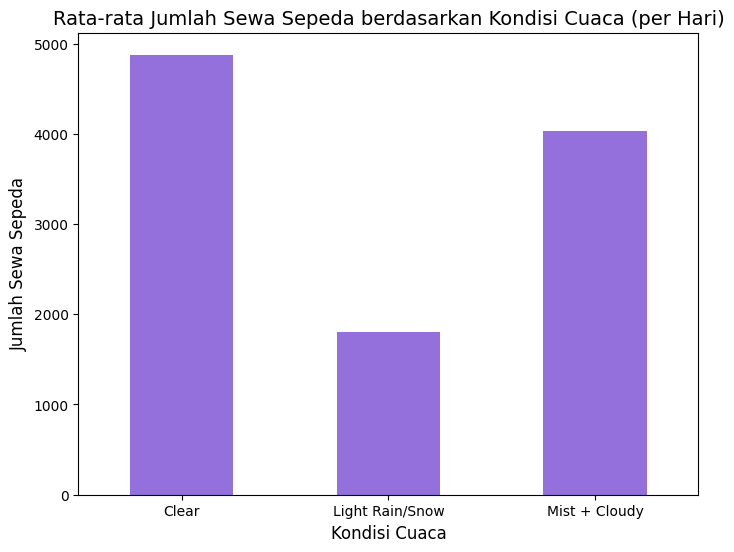

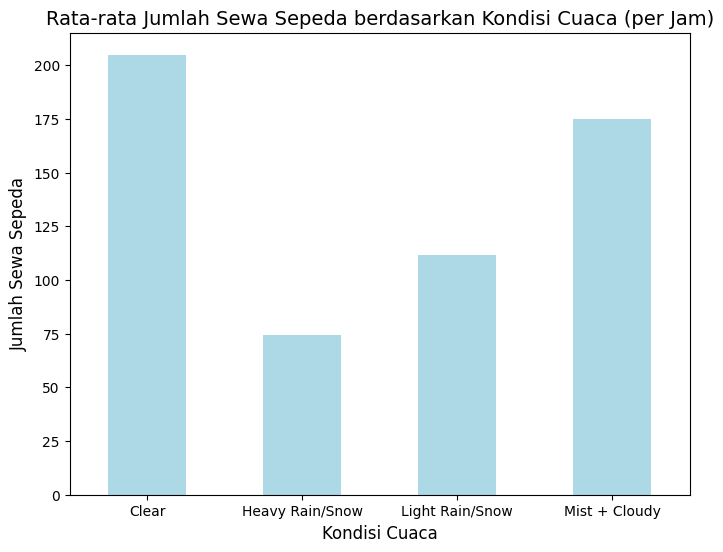

In [29]:
# 9. Visualisasi Pengaruh Kondisi Cuaca terhadap Jumlah Sewa Sepeda (per hari)
plt.figure(figsize=(8, 6))
weather_avg_rentals_day.plot(kind='bar', color='mediumpurple')
plt.title('Rata-rata Jumlah Sewa Sepeda berdasarkan Kondisi Cuaca (per Hari)', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 10. Visualisasi Pengaruh Kondisi Cuaca terhadap Jumlah Sewa Sepeda (per jam)
plt.figure(figsize=(8, 6))
weather_avg_rentals_hour.plot(kind='bar', color='lightblue')
plt.title('Rata-rata Jumlah Sewa Sepeda berdasarkan Kondisi Cuaca (per Jam)', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.show()


# Menyimpan 'day_df' ke dalam file CSV
day_df.to_csv('day_cleaned.csv', index=False)

# Menyimpan 'hour_df' ke dalam file CSV
hour_df.to_csv('hour_cleaned.csv', index=False)